# Fifth step SMG data analysis

#### A few notes:

1. All markdown titles were kept as comments within each code cell.
2. All plot texts are in Spanish, since the presentation is in Spanish too.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
plt.style.use('seaborn-colorblind')
%matplotlib inline
import seaborn as sns
import regex as re
from Levenshtein import distance as lev
from concurrent.futures import ThreadPoolExecutor
from dns import resolver
import requests
import threading
from datetime import datetime
import pickle

# Omitir warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
str(datetime.now())

'2022-09-12 06:36:25.217611'

In [3]:
with open('dict_graph_final.dat', 'rb') as handle:
    data = handle.read()
dict_graph = pickle.loads(data)
dict_graph

{'domains_total': 5309,
 'domains_MX_false': 1141,
 'domains_MX_true': 4168,
 'domains_A_false': 988,
 'domains_A_true': 4321,
 'domains_spam_sink': 94,
 'domains_known_sink': 11,
 'domains_medium_trust': 592,
 'domains_client_trust': 315,
 'users_total': 137513,
 'users_unique': 99917,
 'users_trust_eq1': 82681,
 'emails_null': 455,
 'phones_total': 278763,
 'phones_unique': 164085,
 'phones_cellular': 72115,
 'phones_trust_eq1': 132106,
 'phones_null': 90}

In [4]:
df_mails = pd.read_csv('df_mails_final.csv', index_col=[0])
df_mails.columns

Index(['ID', 'ID_Mail', 'Origen_mail', 'Email', 'user', 'domain', 'valid',
       'valid_domain', 'trust', 'user_trust', 'email_to_use',
       'contactability'],
      dtype='object')

In [5]:
df_joins = pd.read_csv('df_joins_final.csv', index_col=[0])
df_joins.columns

Index(['ID', 'ID_Mail', 'ID_Telefono', 'Origen_mail', 'email_to_use',
       'scoring_mail', 'Origen_telefono', 'cellular', 'phone_to_call',
       'scoring_phone'],
      dtype='object')

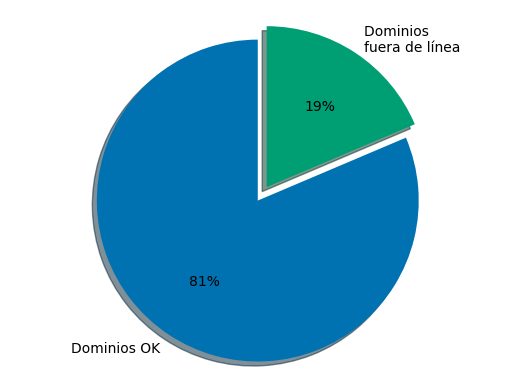

In [6]:
# Plot domains TRUE vs FALSE

labels = ('Dominios OK', 'Dominios \nfuera de línea')
sizes = (dict_graph['domains_A_true'], dict_graph['domains_A_false'])
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [7]:
# Prepair data for plots of email trust
names_list = sorted(df_mails.trust.unique())
values_list = [0] * len(names_list)

for trust in df_mails.trust:
    for i, item in enumerate(names_list):
        if item == trust:
            values_list[i] += 1



name_100 = ['Confianza 100%', 'Confianza 0%', 'Confianza entre \n99% y 40%']
value_100 = []

names_list.pop(len(values_list)-1)
value_100.append(values_list.pop(len(values_list)-1))

names_list.pop(0)
value_100.append(values_list.pop(0))

value_100.append(sum(values_list))
value_100

[135681, 456, 1376]

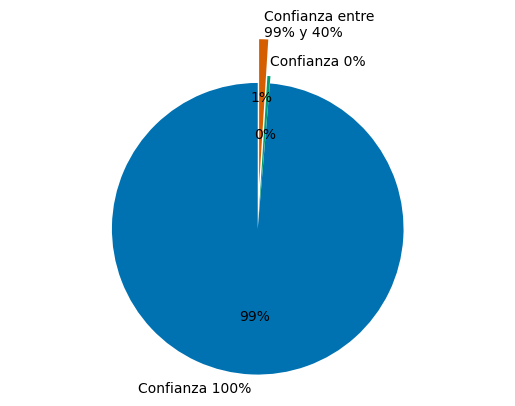

In [9]:
# Plot of email trust thick stroke

labels = name_100
sizes = value_100
explode = (0, 0.05, 0.3)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  

plt.show()

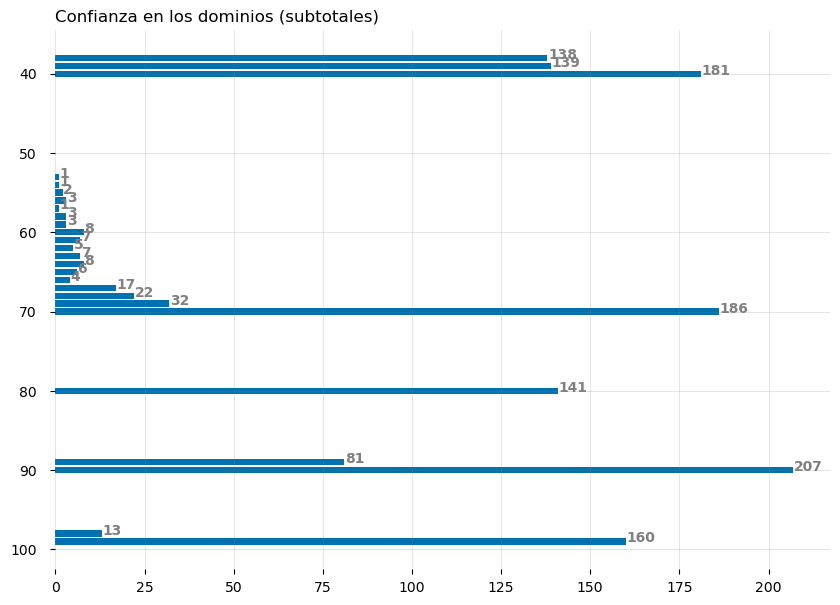

In [9]:
# Plot domains Trust

# Figure Size
fig, ax = plt.subplots(figsize=(10, 7))

names = names_list
values = values_list

# Horizontal Bar Plot
ax.barh(names, values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
# ax.xaxis.set_ticks_position('none')
# ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-', linewidth = 0.5,
        alpha = 0.3)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Confianza en los dominios (subtotales)', loc ='left', )

# Show Plot
plt.show()

In [13]:
# Prepair data for plot of user trust
name_users = ['Confianza = 1', 'Confianza >= 2']
value_users = [0, 0]

for user_trust in df_mails.user_trust:
    if user_trust == 1:
        value_users[0] += 1
    else:
        value_users[1] += 1

value_users

[82681, 54832]

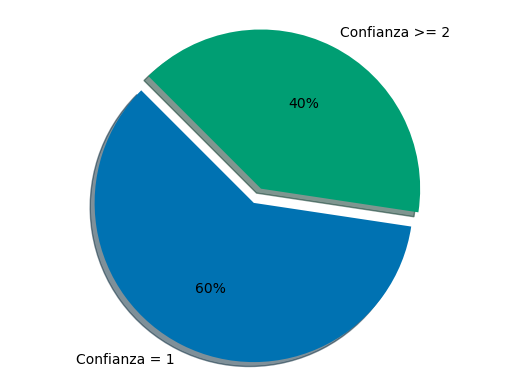

In [25]:
# Plot of email trust 

labels = name_users
sizes = value_users
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=135)
ax1.axis('equal')  

plt.show()

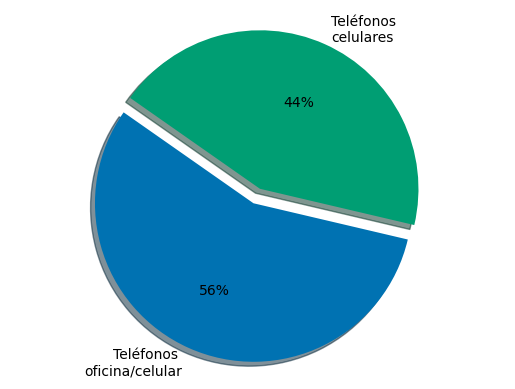

[82681, 54832]

In [34]:
# Plot phone category (cell / office)
labels = ('Teléfonos \noficina/celular', 'Teléfonos \ncelulares')
sizes = (dict_graph['phones_unique'] - dict_graph['phones_cellular'], \
            dict_graph['phones_cellular'])
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=145)
ax1.axis('equal')  

plt.show()

value_users

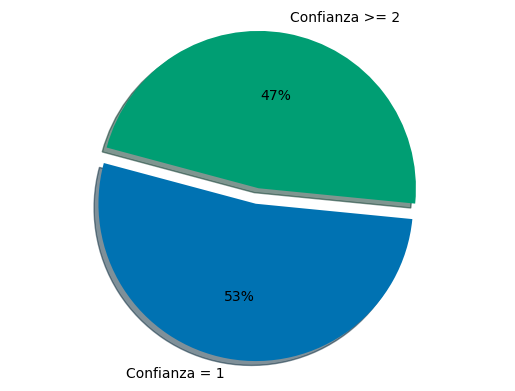

In [36]:
# Plot phone trust
labels = ['Confianza = 1', 'Confianza >= 2']
sizes = (dict_graph['phones_total'] - dict_graph['phones_trust_eq1'], \
            dict_graph['phones_trust_eq1'])
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=165)
ax1.axis('equal')  

plt.show()

In [6]:
str(datetime.now())

'2022-09-11 11:37:20.798944'